## Import Required Libraries

In [318]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Read/Load Data

In [319]:
dataset = pd.read_csv('wdbc.data',header=None)

dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [320]:
## Add Column names
column_names = pd.read_csv('column_names.csv')
column_names = column_names.columns

In [321]:
dataset.columns = list(column_names)[:-1]

In [322]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Check for Null Values

In [323]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

##### No null values in given data

## Let's peek into data

In [324]:
round(dataset.describe(),1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,30371831.4,14.1,19.3,92.0,654.9,0.1,0.1,0.1,0.0,0.2,...,16.3,25.7,107.3,880.6,0.1,0.3,0.3,0.1,0.3,0.1
std,125020585.6,3.5,4.3,24.3,351.9,0.0,0.1,0.1,0.0,0.0,...,4.8,6.1,33.6,569.4,0.0,0.2,0.2,0.1,0.1,0.0
min,8670.0,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,...,7.9,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1
25%,869218.0,11.7,16.2,75.2,420.3,0.1,0.1,0.0,0.0,0.2,...,13.0,21.1,84.1,515.3,0.1,0.1,0.1,0.1,0.3,0.1
50%,906024.0,13.4,18.8,86.2,551.1,0.1,0.1,0.1,0.0,0.2,...,15.0,25.4,97.7,686.5,0.1,0.2,0.2,0.1,0.3,0.1
75%,8813129.0,15.8,21.8,104.1,782.7,0.1,0.1,0.1,0.1,0.2,...,18.8,29.7,125.4,1084.0,0.1,0.3,0.4,0.2,0.3,0.1
max,911320502.0,28.1,39.3,188.5,2501.0,0.2,0.3,0.4,0.2,0.3,...,36.0,49.5,251.2,4254.0,0.2,1.1,1.3,0.3,0.7,0.2


In [325]:
X = dataset.drop(columns=['diagnosis','id'])
y = dataset['diagnosis']

Cancer type: M, Count: 212 (37.26 %)
Cancer type: B, Count: 357 (62.74 %)


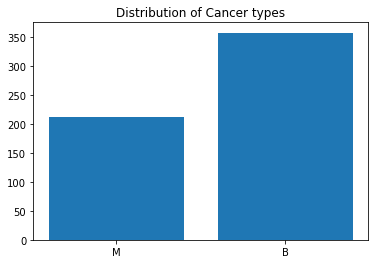

In [326]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print(f'Cancer type: {k}, Count: {v} ({round(per,2)} %)')
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.title('Distribution of Cancer types')
plt.show()

### Split the Data into train and test

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

## Model Buidling and Accuracy

### Decision Tree

In [328]:
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(X_test, y_test)))

scores_dtr = cross_val_score(clf1, X, y, cv=5)

print(scores_dtr)

Accuracy of Decision Tree classifier on original training set: 0.96
Accuracy of Decision Tree classifier on original test set: 0.93
[0.9122807  0.9122807  0.94736842 0.95614035 0.92920354]


### Random Forest

In [329]:
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train,y_train)
print('Accuracy of random forest classifier on original training set: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Accuracy of random forest classifier on original test set: {:.2f}'.format(rfc.score(X_test, y_test)))

scores_rfc = cross_val_score(rfc, X, y, cv=5)

print(scores_rfc)

Accuracy of random forest classifier on original training set: 1.00
Accuracy of random forest classifier on original test set: 0.96
[0.92982456 0.93859649 0.98245614 0.97368421 0.97345133]


### Comparision of   5-fold cross validation accuracies of Random Forest and Decision Tree

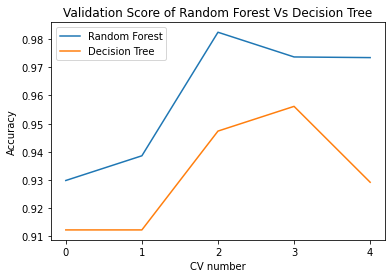

In [330]:
plt.plot(scores_rfc,label='Random Forest')
plt.plot(scores_dtr,label='Decision Tree')
plt.xticks(range(0, 5))
plt.xlabel("CV number")
plt.ylabel("Accuracy")
plt.title('Validation Score of Random Forest Vs Decision Tree')
plt.legend()

## Plot of a chart depicting the effect of varying the Size of Random Forest on the 5-fold cross validation accuracy

In [331]:
rf = RandomForestClassifier(random_state=42)

# specify number of folds
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 100)}


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.139626,0.013187,0.008972,0.000889,100,{'n_estimators': 100},1.0,0.989011,0.934066,0.978022,...,0.962637,0.033763,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.252330,0.007364,0.014561,0.000797,200,{'n_estimators': 200},1.0,0.989011,0.923077,0.967033,...,0.958242,0.035027,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.388162,0.026360,0.021343,0.002326,300,{'n_estimators': 300},1.0,0.989011,0.923077,0.967033,...,0.958242,0.035027,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.489657,0.005696,0.028796,0.004291,400,{'n_estimators': 400},1.0,0.989011,0.923077,0.967033,...,0.958242,0.035027,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.616945,0.012275,0.032112,0.000964,500,{'n_estimators': 500},1.0,0.989011,0.923077,0.967033,...,0.958242,0.035027,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0


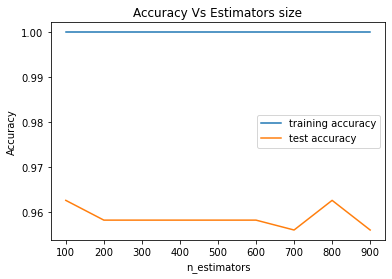

In [332]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title('Accuracy Vs Estimators size')
plt.legend()
plt.show()

#### We got high accuracy at 100 and 800 estimators

## Plot of a chart depicting the effect of varying Feature Subset size of the Random Forest model on the 5-fold cross

In [333]:
rf = RandomForestClassifier(random_state=42)

n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 6, 8, 10, 12]}


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.148404,0.005586,0.009574,0.000489,4,{'max_features': 4},0.956044,1.000000,0.923077,0.967033,...,0.951648,0.031544,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.157778,0.002221,0.009375,0.000489,6,{'max_features': 6},1.000000,0.989011,0.923077,0.967033,...,0.962637,0.029974,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.171541,0.005536,0.009774,0.000399,8,{'max_features': 8},0.989011,0.989011,0.934066,0.956044,...,0.956044,0.030295,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.184305,0.004937,0.009376,0.000488,10,{'max_features': 10},1.000000,0.989011,0.934066,0.956044,...,0.960440,0.029974,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.202260,0.007037,0.009774,0.000398,12,{'max_features': 12},1.000000,0.989011,0.945055,0.978022,...,0.967033,0.028656,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


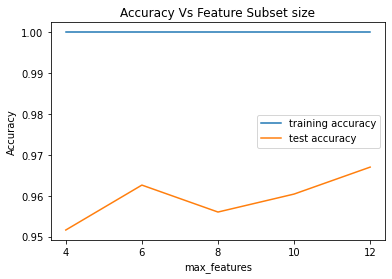

In [334]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.xticks(range(4, 13,2))
plt.title('Accuracy Vs Feature Subset size')
plt.legend()
plt.show()

#### We got high accuracy with feature sub size of 12 and with feature sub size of 6, we got considerably good accuracy

 # I tried to build the simple model with less features and with the best hyper  parameters (just for my exploration)

In [375]:
dataset = pd.read_csv('wdbc.data',header=None)

In [376]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [377]:
round(dataset.describe())

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,30371831.0,14.0,19.0,92.0,655.0,0.0,0.0,0.0,0.0,0.0,...,16.0,26.0,107.0,881.0,0.0,0.0,0.0,0.0,0.0,0.0
std,125020586.0,4.0,4.0,24.0,352.0,0.0,0.0,0.0,0.0,0.0,...,5.0,6.0,34.0,569.0,0.0,0.0,0.0,0.0,0.0,0.0
min,8670.0,7.0,10.0,44.0,144.0,0.0,0.0,0.0,0.0,0.0,...,8.0,12.0,50.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,869218.0,12.0,16.0,75.0,420.0,0.0,0.0,0.0,0.0,0.0,...,13.0,21.0,84.0,515.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,906024.0,13.0,19.0,86.0,551.0,0.0,0.0,0.0,0.0,0.0,...,15.0,25.0,98.0,686.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,8813129.0,16.0,22.0,104.0,783.0,0.0,0.0,0.0,0.0,0.0,...,19.0,30.0,125.0,1084.0,0.0,0.0,0.0,0.0,0.0,0.0
max,911320502.0,28.0,39.0,188.0,2501.0,0.0,0.0,0.0,0.0,0.0,...,36.0,50.0,251.0,4254.0,0.0,1.0,1.0,0.0,1.0,0.0


In [378]:
column_names = pd.read_csv('column_names.csv')
column_names = column_names.columns

In [379]:
dataset.columns = list(column_names)[:-1]

In [380]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [381]:
X = dataset.drop(columns=['diagnosis','id'])
y = dataset['diagnosis']

In [382]:
print(f"\nFeature Correlation for {X.shape[1]} features\n")
X.corr()


Feature Correlation for 30 features



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [383]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop features 
X.drop(to_drop, axis=1, inplace=True)

In [384]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364


In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [386]:
print(f"\nFeature Correlation for {X.shape[1]} features\n")
X.corr()


Feature Correlation for 13 features



,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
radius_mean,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,0.376169,-0.104321,0.163953
texture_mean,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.163851,0.009127,0.105008
smoothness_mean,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.380676,0.200774,0.394309
compactness_mean,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.642262,0.229977,0.510223
symmetry_mean,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.393298,0.449137,0.699826
fractal_dimension_mean,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.341198,0.345007,0.334019
radius_se,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.513346,0.240567,0.094543
texture_se,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.230283,0.411621,-0.128215
smoothness_se,-0.222600,0.006614,0.332375,0.135299,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.328429,0.413506,-0.107342
compactness_se,0.206000,0.191975,0.318943,0.738722,0.421659,0.559837,0.356065,0.231700,0.336696,1.000000,0.744083,0.394713,0.277878


In [387]:
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12,random_state=42)
clf1.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(X_test, y_test)))

Accuracy of Decision Tree classifier on original training set: 0.93
Accuracy of Decision Tree classifier on original test set: 0.86


In [388]:
scores_dtr = cross_val_score(clf1, X, y, cv=5)

In [389]:
scores_dtr

array([0.85087719, 0.85087719, 0.9122807 , 0.93859649, 0.91150442])

In [390]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=42)

In [391]:
# fit
rfc.fit(X_train,y_train)
print('Accuracy of random forest classifier on original training set: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Accuracy of random forest classifier on original test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on original training set: 1.00
Accuracy of random forest classifier on original test set: 0.91


In [392]:
scores_rfc = cross_val_score(rfc, X, y, cv=5)

In [393]:
scores_rfc

array([0.92105263, 0.92105263, 0.93859649, 0.96491228, 0.9380531 ])

Text(0.5, 1.0, 'Validation Score of Random Forest Vs Decision Tree')

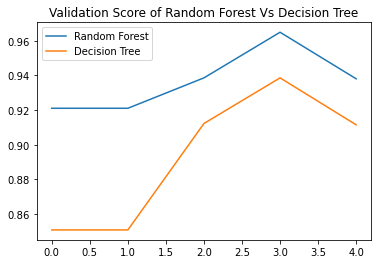

In [394]:
plt.plot(scores_rfc,label='Random Forest')
plt.plot(scores_dtr,label='Decision Tree')
plt.legend()
plt.title('Validation Score of Random Forest Vs Decision Tree')

In [395]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,6,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'max_features': [4,6,8,10,12]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)

In [396]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   17.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': [4, 6, 8, 10, 12],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200)},
             return_train_score=True, verbose=1)

In [397]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9032967032967033 using {'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [410]:
rf = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,random_state=42)

In [411]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 100)}


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, max_features=6,
                                              min_samples_leaf=100,
                                              min_samples_split=200,
                                              random_state=42),
             param_grid={'n_estimators': range(100, 1000, 100)},
             return_train_score=True, scoring='accuracy')

In [412]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.114073,0.012143,0.007604,0.000497,100,{'n_estimators': 100},0.901099,0.923077,0.901099,0.934066,...,0.903297,0.026374,1,0.903846,0.906593,0.906593,0.892857,0.914835,0.904945,0.007079
1,0.207102,0.004876,0.013713,0.000915,200,{'n_estimators': 200},0.901099,0.923077,0.901099,0.934066,...,0.903297,0.026374,1,0.906593,0.898352,0.906593,0.895604,0.914835,0.904396,0.006819
2,0.305405,0.003513,0.019758,0.000419,300,{'n_estimators': 300},0.901099,0.923077,0.901099,0.934066,...,0.903297,0.026374,1,0.903846,0.895604,0.906593,0.895604,0.914835,0.903297,0.007248
3,0.408621,0.005762,0.025961,0.000634,400,{'n_estimators': 400},0.901099,0.923077,0.901099,0.934066,...,0.903297,0.026374,1,0.909341,0.903846,0.906593,0.898352,0.914835,0.906593,0.005495
4,0.516996,0.016143,0.031868,0.000670,500,{'n_estimators': 500},0.901099,0.923077,0.901099,0.934066,...,0.903297,0.026374,1,0.909341,0.903846,0.906593,0.895604,0.914835,0.906044,0.006360


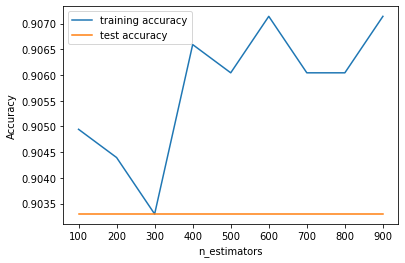

In [413]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [414]:
rf = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=500, random_state=42)

In [415]:
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 6,8, 10]}


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, min_samples_leaf=100,
                                              min_samples_split=200,
                                              n_estimators=500,
                                              random_state=42),
             param_grid={'max_features': [4, 6, 8, 10]},
             return_train_score=True, scoring='accuracy')

In [416]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.557127,0.014330,0.037175,0.000989,4,{'max_features': 4},0.879121,0.901099,0.879121,0.912088,...,0.883516,0.022628,3,0.895604,0.884615,0.895604,0.895604,0.909341,0.896154,0.007848
1,0.565450,0.009164,0.037079,0.001318,6,{'max_features': 6},0.901099,0.923077,0.901099,0.934066,...,0.903297,0.026374,1,0.909341,0.903846,0.906593,0.895604,0.914835,0.906044,0.006360
2,0.634734,0.035323,0.040276,0.003372,8,{'max_features': 8},0.901099,0.923077,0.868132,0.923077,...,0.887912,0.037684,2,0.903846,0.898352,0.881868,0.895604,0.906593,0.897253,0.008618
3,0.584618,0.001950,0.035813,0.000652,10,{'max_features': 10},0.890110,0.923077,0.835165,0.879121,...,0.863736,0.045891,4,0.868132,0.859890,0.865385,0.859890,0.870879,0.864835,0.004396


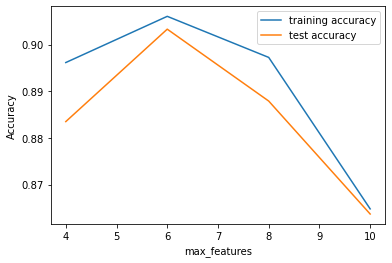

In [417]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()